<div style="float:left">
    <h1 style="width:450px">Live Coding 8: </h1>
    <h2 style="width:450px">Visualisation and Linked Data</h2>
</div>
<div style="float:right"><img width="100" src="https://github.com/jreades/i2p/raw/master/img/casa_logo.jpg" /></div>

<div style="border: dotted 1px rgb(156,121,26); padding: 10px; margin: 5px; background-color: rgb(255,236,184)"><i>Note</i>: You should download this notebook from GitHub and then save it to your own copy of the repository. I'd suggest adding it (<tt>git add Live-...</tt>) right away and then committing (<tt>git commit -m "Some message"</tt>). Do this again at the end of the class and you'll have a record of everything you did, then you can <tt>git push</tt> it to GitHub.</div>

In [1]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt

## Task 1. Load Chicago Data

Load the Census Tracts.

In [2]:
tracts = gpd.read_file('https://github.com/jreades/i2p/blob/master/data/src/Census_Tracts.gpkg?raw=true')
print(tracts.columns.values)
print(tracts.shape)

['STATEFP10' 'COUNTYFP10' 'TRACTCE10' 'GEOID10' 'NAME10' 'NAMELSAD10'
 'COMMAREA' 'COMMAREA_N' 'NOTES' 'geometry']
(801, 10)


<AxesSubplot:>

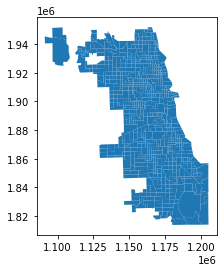

In [3]:
tracts.plot()

In [4]:
len(tracts.NAME10.unique())

801

<AxesSubplot:>

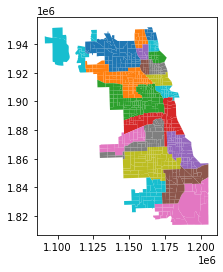

In [5]:
tracts.plot(column='COMMAREA')

Load the Crime Data.

In [6]:
df = pd.read_csv('https://github.com/jreades/i2p/blob/master/data/src/2019-Crime.csv.gz?raw=true', compression='gzip')
df.shape

(260025, 22)

Convert to a geography.

In [7]:
df.drop(index=df[df.Latitude.isna()].index, inplace=True)
df.drop(index=df[df.Longitude.isna()].index, inplace=True)
df.shape

(258853, 22)

In [8]:
df.columns.values

array(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic',
       'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'], dtype=object)

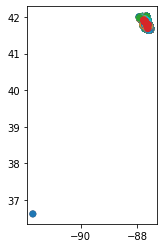

In [9]:
crimes = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude, crs='epsg:4326'))
crimes.plot(column='Primary Type');

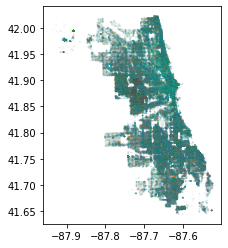

In [10]:
crimes.drop(index=crimes[crimes.Longitude < -89].index, inplace=True)
crimes.plot(column='Primary Type', markersize=0.5, alpha=0.05);

#### Join Crimes to Tracts using a Spatial Join

In [11]:
crimes['Primary Type'].unique()

array(['OFFENSE INVOLVING CHILDREN', 'ROBBERY', 'MOTOR VEHICLE THEFT',
       'OTHER OFFENSE', 'DECEPTIVE PRACTICE', 'BATTERY', 'NARCOTICS',
       'KIDNAPPING', 'CRIMINAL SEXUAL ASSAULT', 'ASSAULT', 'SEX OFFENSE',
       'BURGLARY', 'THEFT', 'WEAPONS VIOLATION', 'HOMICIDE',
       'CRIMINAL DAMAGE', 'CRIMINAL TRESPASS', 'INTIMIDATION', 'ARSON',
       'OBSCENITY', 'LIQUOR LAW VIOLATION', 'HUMAN TRAFFICKING',
       'STALKING', 'PUBLIC PEACE VIOLATION',
       'INTERFERENCE WITH PUBLIC OFFICER', 'CRIM SEXUAL ASSAULT',
       'PUBLIC INDECENCY', 'CONCEALED CARRY LICENSE VIOLATION',
       'PROSTITUTION', 'GAMBLING', 'OTHER NARCOTIC VIOLATION',
       'NON-CRIMINAL'], dtype=object)

In [12]:
crimes = crimes.to_crs(tracts.crs)

Here's our first spatial join. By default it will be an _inner_ join.

In [13]:
ptype='PROSTITUTION'
tract_crimes = gpd.sjoin(crimes[crimes['Primary Type']==ptype], tracts, op='within')

In [14]:
tract_crimes.head(3)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,index_right,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,COMMAREA,COMMAREA_N,NOTES
8989,11934142,JC562348,12/27/2019 06:10:00 PM,001XX S KENTON AVE,1506,PROSTITUTION,SOLICIT ON PUBLIC WAY,STREET,True,False,...,68,17,031,252202,17031252202,2522.02,Census Tract 2522.02,25,25,None
9351,11934044,JC562316,12/27/2019 06:35:00 PM,0000X S KENTON AVE,1506,PROSTITUTION,SOLICIT ON PUBLIC WAY,STREET,True,False,...,68,17,031,252202,17031252202,2522.02,Census Tract 2522.02,25,25,None
10143,11932996,JC552851,12/19/2019 11:38:00 AM,001XX S KENTON AVE,1506,PROSTITUTION,SOLICIT ON PUBLIC WAY,STREET,True,False,...,68,17,031,252202,17031252202,2522.02,Census Tract 2522.02,25,25,None


In [15]:
print(tract_crimes.columns.values)

['ID' 'Case Number' 'Date' 'Block' 'IUCR' 'Primary Type' 'Description'
 'Location Description' 'Arrest' 'Domestic' 'Beat' 'District' 'Ward'
 'Community Area' 'FBI Code' 'X Coordinate' 'Y Coordinate' 'Year'
 'Updated On' 'Latitude' 'Longitude' 'Location' 'geometry' 'index_right'
 'STATEFP10' 'COUNTYFP10' 'TRACTCE10' 'GEOID10' 'NAME10' 'NAMELSAD10'
 'COMMAREA' 'COMMAREA_N' 'NOTES']


<AxesSubplot:>

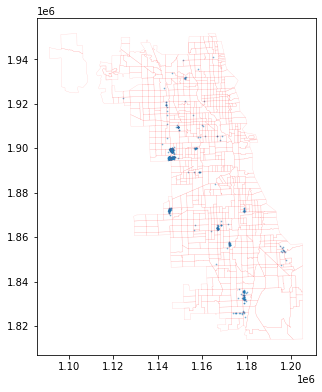

In [16]:
ax = tract_crimes.plot(markersize=0.5, alpha=0.5, figsize=(5,10))
tracts.plot(ax=ax, edgecolor='r', linewidth=0.25, facecolor='none', alpha=0.25)

#### Tidy Up

```python
['ID' 'Case Number' 'Date' 'Block' 'IUCR' 'Primary Type' 'Description'
 'Location Description' 'Arrest' 'Domestic' 'Beat' 'District' 'Ward'
 'Community Area' 'FBI Code' 'X Coordinate' 'Y Coordinate' 'Year'
 'Updated On' 'Latitude' 'Longitude' 'Location' 'geometry' 'index_right'
 'STATEFP10' 'COUNTYFP10' 'TRACTCE10' 'GEOID10' 'NAME10' 'NAMELSAD10'
 'COMMAREA' 'COMMAREA_N' 'NOTES']
```

In [17]:
to_drop = ['ID','Case Number','Date','Block','IUCR','Domestic','FBI Code','X Coordinate',
           'Y Coordinate','Year','Updated On','Latitude','Longitude','Location','index_right',
           'COMMAREA_N','NOTES']
tract_crimes.drop(columns=to_drop, inplace=True)
print(tract_crimes.shape)

(680, 16)


#### And Save

In [18]:
tract_crimes.to_file(os.path.join('data','geo',f"Tract_Crimes-{ptype}.gpkg"), driver='GPKG')

## Task 2. Grouping Data

#### Grouping by Tract

In [19]:
tc_grdf = tract_crimes.groupby('NAME10').agg(np.sum)

In [20]:
tc_grdf.sample(5)

,Arrest,Beat,District,Ward,Community Area
NAME10,,,,,
8348,1,712,7,16.0,68
3818,8,1792,16,24.0,304
4314,1,421,4,7.0,43
4907,1,511,5,9.0,49
302,1,2433,24,48.0,77


Does that make sense???

In [21]:
print(tract_crimes[tract_crimes.NAME10=='1502'].shape)
print(tract_crimes[tract_crimes.NAME10=='2522.02'].shape)

(1, 16)
(54, 16)


In [22]:
tc_grdf.Arrest.sample(5, random_state=42)

NAME10
1502    1
8311    1
2434    1
1301    1
3007    1
Name: Arrest, dtype: int64

In [23]:
print(f"Mean arrests per Census Tract: {tc_grdf.Arrest.mean():.0f}")
print(f"Median arrests per Census Tract: {tc_grdf.Arrest.median():.0f}")

Mean arrests per Census Tract: 9
Median arrests per Census Tract: 1


#### A Basic Boxplot

See if you can create a basic boxplot of price by room type, and then set the y-limits to 0-500 (£/night).

(0.0, 30.0)

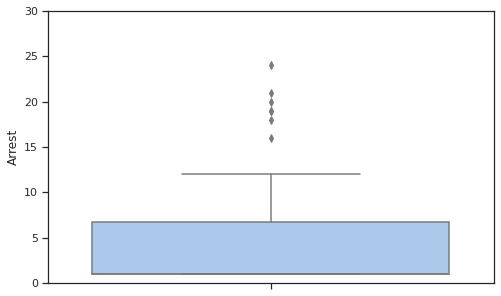

In [24]:
sns.set_style('whitegrid')
sns.set_theme(style="ticks", palette="pastel")
f,ax = plt.subplots(figsize=(8,5))
sns.boxplot(y=tc_grdf.Arrest)
ax.set_ylim([0,30])

Let's look at the distribution a bit differently:

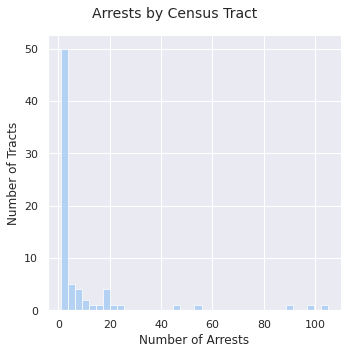

In [25]:
sns.set_style('darkgrid')
ax = sns.displot(tc_grdf.Arrest)
ax.set(xlabel='Number of Arrests', ylabel='Number of Tracts')
plt.gcf().subplots_adjust(top=0.9)
plt.gcf().suptitle('Arrests by Census Tract', fontsize=14);

Join this back to a geography!

In [26]:
print(tracts.columns.values)
print(tc_grdf.columns.values)

['STATEFP10' 'COUNTYFP10' 'TRACTCE10' 'GEOID10' 'NAME10' 'NAMELSAD10'
 'COMMAREA' 'COMMAREA_N' 'NOTES' 'geometry']
['Arrest' 'Beat' 'District' 'Ward' 'Community Area']


In [27]:
tcgr_gdf = pd.merge(tracts, tc_grdf, left_on='NAME10', right_index=True)

In [28]:
tcgr_gdf.head(3)

,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,COMMAREA,COMMAREA_N,NOTES,geometry,Arrest,Beat,District,Ward,Community Area
21,17,031,834800,17031834800,8348,Census Tract 8348,68,68,None,"POLYGON ((1170721.790 1863187.997, 1170721.047...",1,712,7,16.0,68
28,17,031,040202,17031040202,402.02,Census Tract 402.02,4,4,None,"POLYGON ((1158746.754 1934451.249, 1158718.477...",1,2011,20,40.0,4
50,17,031,837000,17031837000,8370,Census Tract 8370,27,27,None,"POLYGON ((1157752.239 1899069.031, 1157754.217...",11,13442,132,297.0,297


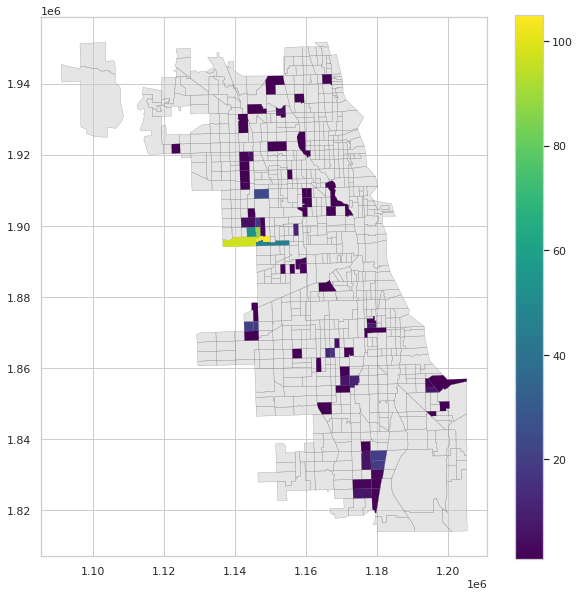

In [29]:
sns.set_style('whitegrid')
ax = tracts.plot(facecolor=(0.8, 0.8, 0.8, 0.5), edgecolor='gray', linewidth=0.25, figsize=(10,10))
tcgr_gdf.plot(ax=ax, column='Arrest', cmap='viridis', edgecolor='none', legend=True);

#### Discover Fonts Installed

I find matplotlib's use of fonts to be _profoundly_ weird. Basically, you need to investigate the 'font cache' folder and see what's listed there. Depending on how you installed the Python libraries you _might_ have access to your whole computer's fonts (if you used `conda`) or to only those free fonts that come with Linux (if you used Vagrant or Docker). This code may not even run on a PC or Mac with `conda` in which case you'll need to do some more investigating and poking around...

In [30]:
import matplotlib
loc = matplotlib.get_cachedir()
!ls {loc}

fontlist-v330.json


Hopefully you will see a list of installed fonts when you run this. See if you can make sense of what this code does!

In [31]:
fonts = !cat {loc + '/fontlist-v330.json'}
fonts = set(list(filter(lambda x:'"name"' in x, fonts)))
fonts = [x.replace('      "name": "','').replace('",','') for x in fonts]
print(fonts)

['Computer Modern', 'LMRoman10', 'LMMonoPropLt10', 'cmr10', 'STIXNonUnicode', 'LMRomanDunh10', 'Liberation Serif', 'LMRomanUnsl10', 'DejaVu Sans Mono', 'LMSans10', 'ZapfDingbats', 'LMSansQuot8', 'LMMonoLtCond10', 'DejaVu Serif', 'Liberation Mono', 'Palatino', 'DejaVu Sans', 'Utopia', 'LMMonoLt10', 'ITC Zapf Dingbats', 'Courier', 'STIXSizeTwoSym', 'ITC Zapf Chancery', 'LMMonoSlant10', 'Liberation Sans Narrow', 'Symbol', 'DejaVu Sans Display', 'Helvetica', 'DejaVu Serif Display', 'cmtt10', 'LMMono10', 'ITC Avant Garde Gothic', 'LMMonoCaps10', 'cmsy10', 'LMRomanCaps10', 'STIXSizeFourSym', 'STIXSizeOneSym', 'LMRomanSlant10', 'Times', 'ITC Bookman', 'LMMonoProp10', 'cmss10', 'STIXSizeThreeSym', 'Liberation Sans', 'cmex10', 'STIXSizeFiveSym', 'Bitstream Charter', 'STIXGeneral', 'cmmi10', 'LMSansDemiCond10', 'cmb10', 'New Century Schoolbook', 'LMRomanDemi10']


I am setting this as the 'title font' (`tfont`) to use in the output below. You can pick another font and see what happens. The format for this is a dictionary, so where you see `fontdict` in the `matplotlib` documentation this should work:

In [32]:
tfont = {'fontname':'Liberation Sans Narrow', 'horizontalalignment':'left'}

Create at Atlas-Type Output

We're now going to emulate a _bit_ of QGIS' Atlas function by creating two subplots and then adding a _third_ plot afterwards that shows where the borough is.

In [33]:
crimes.columns.values

array(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic',
       'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location', 'geometry'], dtype=object)

In [34]:
grp_crimes = crimes[['Community Area','Primary Type','Arrest']].groupby(['Community Area','Primary Type']).agg(np.sum).reset_index()

In [35]:
grp_crimes

,Community Area,Primary Type,Arrest
0,1,ARSON,0
1,1,ASSAULT,45
2,1,BATTERY,146
3,1,BURGLARY,19
4,1,CRIM SEXUAL ASSAULT,0
...,...,...,...
1902,77,ROBBERY,8
1903,77,SEX OFFENSE,4
1904,77,STALKING,0
1905,77,THEFT,80


In [36]:
grp_crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1907 entries, 0 to 1906
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Community Area  1907 non-null   int64 
 1   Primary Type    1907 non-null   object
 2   Arrest          1907 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 44.8+ KB


In [37]:
tracts.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   STATEFP10   801 non-null    object  
 1   COUNTYFP10  801 non-null    object  
 2   TRACTCE10   801 non-null    object  
 3   GEOID10     801 non-null    object  
 4   NAME10      801 non-null    object  
 5   NAMELSAD10  801 non-null    object  
 6   COMMAREA    801 non-null    object  
 7   COMMAREA_N  801 non-null    int64   
 8   NOTES       12 non-null     object  
 9   geometry    801 non-null    geometry
dtypes: geometry(1), int64(1), object(8)
memory usage: 62.7+ KB


<AxesSubplot:>

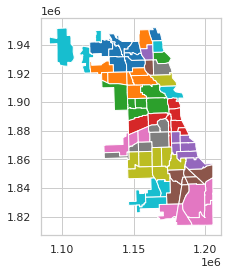

In [38]:
t1 = tracts.dissolve(by='COMMAREA').reset_index()
t1.columns.values
t1.plot(column='COMMAREA')

In [39]:
t1.sample(3)

,COMMAREA,geometry,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,COMMAREA_N,NOTES
21,29,"POLYGON ((1150727.927 1889085.421, 1150730.669...",17,031,843300,17031843300,8433,Census Tract 8433,29,None
39,45,"POLYGON ((1193281.199 1847747.096, 1193250.091...",17,031,834300,17031834300,8343,Census Tract 8343,45,None
9,18,"POLYGON ((1131921.134 1917892.472, 1131924.978...",17,031,831600,17031831600,8316,Census Tract 8316,18,None


In [40]:
tgrp = pd.merge(grp_crimes, t1, how='left', left_on='Community Area', right_on='COMMAREA_N')
print(tgrp.columns.values)
tgrp = tgrp.set_geometry('geometry')

['Community Area' 'Primary Type' 'Arrest' 'COMMAREA' 'geometry'
 'STATEFP10' 'COUNTYFP10' 'TRACTCE10' 'GEOID10' 'NAME10' 'NAMELSAD10'
 'COMMAREA_N' 'NOTES']


<AxesSubplot:>

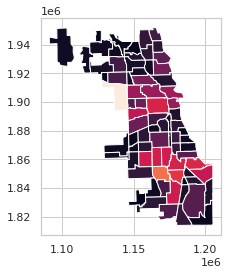

In [41]:
tgrp[tgrp['Primary Type']=='ASSAULT'].plot(column='Arrest')

<AxesSubplot:>

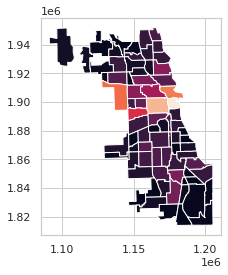

In [42]:
tgrp[tgrp['Primary Type']=='ROBBERY'].plot(column='Arrest')

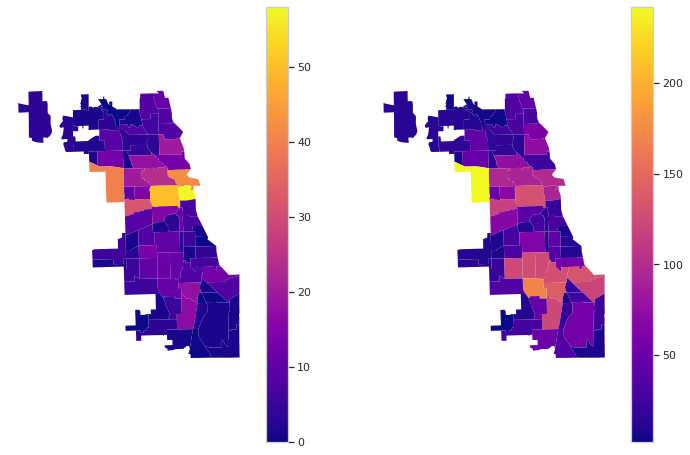

In [43]:
f,axes = plt.subplots(1,2,figsize=(12,8))

sns.set_style('whitegrid')
tgrp[tgrp['Primary Type']=='ROBBERY'].plot(ax=axes[0], column='Arrest', cmap='plasma', edgecolor='none', legend=True)
tgrp[tgrp['Primary Type']=='ASSAULT'].plot(ax=axes[1], column='Arrest', cmap='plasma', edgecolor='none', legend=True);

for ax in axes:
    ax.axis('off')

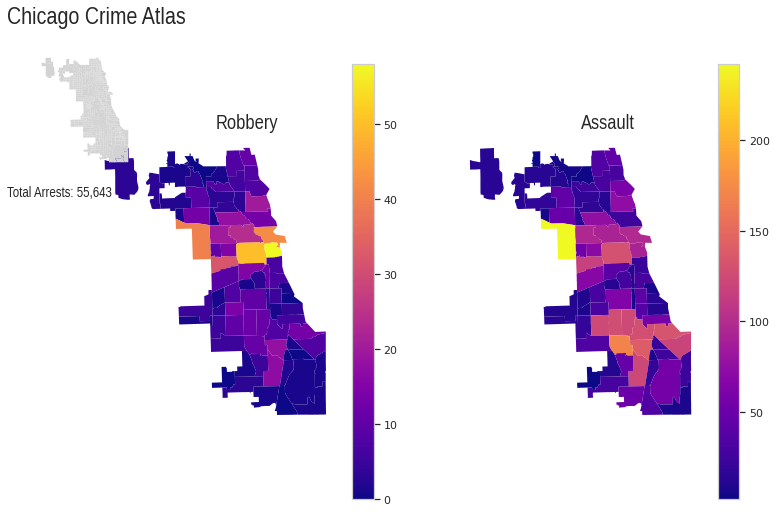

In [44]:
f,axes = plt.subplots(1,2,figsize=(12,8))

plt1 = 'ROBBERY'
plt2 = 'ASSAULT'

tgrp[tgrp['Primary Type']==plt1].plot(ax=axes[0], column='Arrest', cmap='plasma', edgecolor='none', legend=True)
tgrp[tgrp['Primary Type']==plt2].plot(ax=axes[1], column='Arrest', cmap='plasma', edgecolor='none', legend=True);

for ax in axes:
    ax.axis('off')

ax2 = f.add_axes([0.015, 0.7, 0.2, 0.2])
tracts.plot(facecolor='lightgrey', edgecolor='none', ax=ax2)
ax2.axis('off')

# Note -- calling this an atlas of crime would be *seriously* 
# misleading because it's only a record of crimes that resulted
# in police action of some sort
f.suptitle('Chicago Crime Atlas', x=0.025, ha='left', size=24, **tfont)
axes[0].set_title(plt1.capitalize(), size=20, **tfont)
axes[1].set_title(plt2.capitalize(), size=20, **tfont)

plt.figtext(x=0.025, y=0.65, s=f"Total Arrests: {tgrp.Arrest.sum():,.0f}", size=14, **tfont);